In [18]:
import matplotlib.pyplot as plt
import numpy as np
import util
import pandas as pd

from linear_model import LinearModel
import util

In [179]:
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.
        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        
        # reshaping gives an array of m arrays where each has 1 array with n entries
        # self.x - reshaped- calculates x_i - x over all i and gives one array for each x
        ## so the output before norm is m arrays with length(x) entries in each where each entry has n terms
        ## norm calculates the L2 norm for each entry giving m arrays with length(x) entries in each where each entry is 1 term
        ## along one row there are weights corresponding to 1 x term for all of the possible x_i
        w = np.exp( -np.linalg.norm((self.x - np.reshape(x, (m, -1, n))), ord=2,axis=2)**2 / (2*self.tau**2) )
        
        # takes the terms along a row and makes a diagonal matrix out of them
        ## gives length(x) diagonal matrices 
        w = np.apply_along_axis(np.diag, axis = 1, arr=w)
        
        # gives the theta for length(x) terms where each term has n weights
        theta = np.linalg.inv(self.x.T @ w @ self.x) @ self.x.T @ w @ self.y

        # ij ij means elementwise multiple the i of x with i of theta and similar for j
        # output only i means that everything in row i should be summed 
        # faster than separate elemtn wise multiplication and then summation
        return np.einsum('ij,ij->i', x, theta)
        # *** END CODE HERE ***


In [204]:
def plot(x, y, x_eval, y_pred, title):
    plt.figure()
    plt.plot(x[:,-1], y, 'bx', label='label')
    plt.plot(x_eval[:,-1], y_pred, 'ro', label='prediction')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='upper left')
    plt.show()
    
def main1(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    #x_valid, y_valid = util.load_dataset('ds5_valid.csv', add_intercept=True)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

    # *** START CODE HERE ***
    lwr = LocallyWeightedLinearRegression(tau)
    lwr.fit(x_train,y_train)
    y_pred = lwr.predict(x_eval)
    #print(y_pred)
    
    mse = np.mean((y_eval - y_pred)**2)
    print("Mean Squared Error =", mse)
    
    plot(x_train, y_train, x_eval, y_pred, 'Predictions from Validation set plotted on training set')
    
    plot(x_eval, y_eval, x_eval, y_pred, 'Predictions from Validation set plotted on actual validation set values')
    # Get MSE value on the validation set
    # Plot validation predictions on top of training set
    # No need to save predictions
    # Plot data
    # *** END CODE HERE ***

Mean Squared Error = 0.33053126821375267


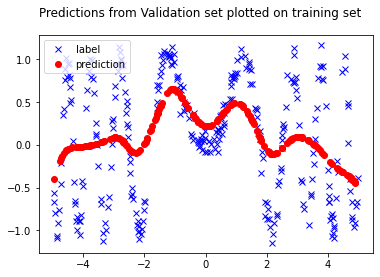

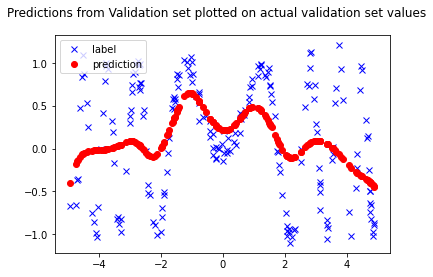

In [205]:
tau= 0.5
train_path = 'ds5_train.csv'
eval_path = 'ds5_valid.csv'

main1(tau, train_path,eval_path )

## The model is underfitting

In [212]:
def main2(tau_values, train_path, valid_path, test_path):
    """Problem 5(c): Tune the bandwidth paramater tau for LWR.

    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
    """
    best_tau = None
    best_mse = 1000000000000000000000000000000000000000000000
    best_y_pred = None
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    #x_valid, y_valid = util.load_dataset('ds5_valid.csv', add_intercept=True)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    x_test, y_test = util.load_dataset(test_path, add_intercept=True)

    # *** START CODE HERE ***
    for tau in tau_values:
        lwr = LocallyWeightedLinearRegression(tau)
        lwr.fit(x_train,y_train)
        y_pred = lwr.predict(x_eval)
        #print(y_pred)

        mse = np.mean((y_eval - y_pred)**2)
        
        print("\n\nTau =", tau)
        print("\nMean Squared Error =", mse)
        plot(x_eval, y_eval, x_eval, y_pred, 'Predictions from Validation set plotted on actual validation set values')
        
        
        if mse < best_mse:
            best_mse = mse
            best_tau = tau
            best_y_pred = y_pred
    
    print("\nBest tau is", best_tau)
    print("\nLowest Mean Squared Error =", best_mse)
    #plot(x_train, y_train, x_eval, y_pred, 'Predictions from Validation set plotted on training set')
    
    lwr = LocallyWeightedLinearRegression(best_tau)
    lwr.fit(x_train,y_train)
    y_pred = lwr.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    print("\nMean Squared Error on test data =", mse)
    plot(x_test, y_test, x_test, y_pred, 'Predictions from test set plotted on actual test set values')
        
    # *** END CODE HERE ***



Tau = 0.03

Mean Squared Error = 0.01809616312414749


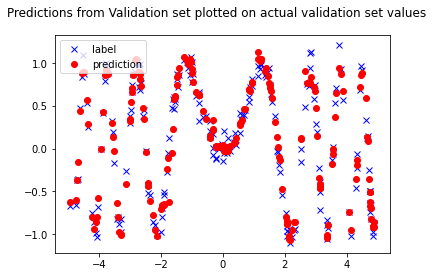



Tau = 0.05

Mean Squared Error = 0.012400076150484822


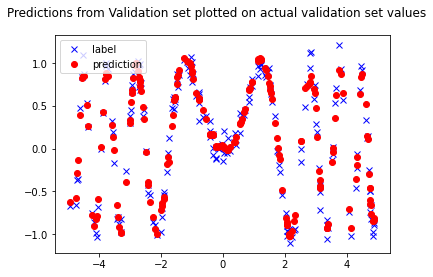



Tau = 0.1

Mean Squared Error = 0.024224589379806573


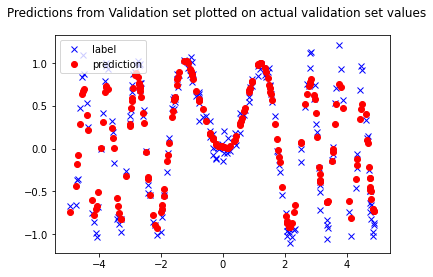



Tau = 0.5

Mean Squared Error = 0.33053126821375267


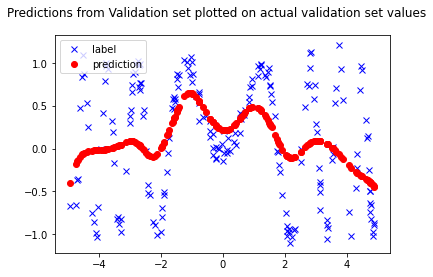



Tau = 1.0

Mean Squared Error = 0.40009594801808623


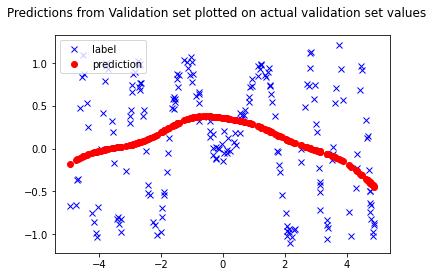



Tau = 10.0

Mean Squared Error = 0.4337439227232362


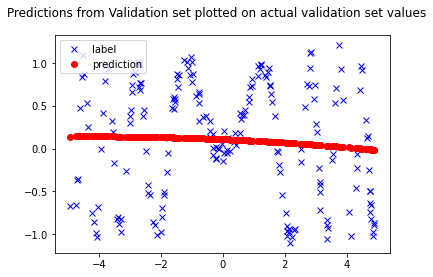


Best tau is 0.05

Lowest Mean Squared Error = 0.012400076150484822

Mean Squared Error on test data = 0.016990143386868127


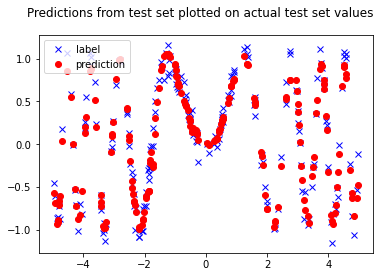

In [213]:
tau_values= [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1] 
train_path = 'ds5_train.csv'
eval_path = 'ds5_valid.csv'
test_path = 'ds5_test.csv'

main2(tau_values, train_path,eval_path, test_path )